In [ ]:
from IPython.display import clear_output

In [ ]:
%%bash

rm -r data || true
mkdir -p data

wget -q https://github.com/DataTalksClub/nyc-tlc-data/releases/download/yellow/yellow_tripdata_2019-01.csv.gz \
    -O data/yellow_tripdata_2019-01.csv.gz
wget -q https://github.com/DataTalksClub/nyc-tlc-data/releases/download/misc/taxi_zone_lookup.csv \
    -O data/taxi_zone_lookup.csv

ls -l data

## Scaling Large Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
[v for v in dir(pd) if v.startswith('read')]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table',
 'read_xml']

In [3]:
%%time

df_yellow = pd.read_csv('data/yellow_tripdata_2019-01.csv.gz', parse_dates=[
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
], dtype={
    'passenger_count': np.int8,
    'payment_type': np.int8,
    'PULocationID': np.int16,
    'DOLocationID': np.int16,
    'store_and_fwd_flag': pd.CategoricalDtype(categories=['N', 'Y'], ordered=True),
}, )

df_yellow.head()

CPU times: user 19.8 s, sys: 1.85 s, total: 21.6 s
Wall time: 22 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [4]:
df_yellow.shape

(7667792, 18)

In [5]:
df_yellow.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                    int8
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag             category
PULocationID                      int16
DOLocationID                      int16
payment_type                       int8
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [6]:
df_yellow.isna().sum(axis=0)

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4855978
dtype: int64

In [7]:
df_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int8          
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     category      
 7   PULocationID           int16         
 8   DOLocationID           int16         
 9   payment_type           int8          
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: category(1), dateti

In [8]:
df_yellow.loc[:, df_yellow.dtypes == np.float64].agg(['min', 'max'], axis=0)

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
min,0.0,-362.00,-60.00,-0.5,-63.50,-70.0,-0.3,-362.80,0.0
max,831.8,623259.86,535.38,60.8,787.25,3288.0,0.6,623261.66,2.5


In [9]:
for col in df_yellow.columns[df_yellow.dtypes == np.float64]:
    df_yellow[col] = df_yellow[col].astype(np.float32)

In [10]:
df_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int8          
 4   trip_distance          float32       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     category      
 7   PULocationID           int16         
 8   DOLocationID           int16         
 9   payment_type           int8          
 10  fare_amount            float32       
 11  extra                  float32       
 12  mta_tax                float32       
 13  tip_amount             float32       
 14  tolls_amount           float32       
 15  improvement_surcharge  float32       
 16  total_amount           float32       
 17  congestion_surcharge   float32       
dtypes: category(1), dateti

In [17]:
df_yellow.to_parquet('data/yellow_tripdata_2019-01.parquet', index=False)

In [18]:
%%time

df_yellow = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
df_yellow.head()

CPU times: user 1.23 s, sys: 1.22 s, total: 2.45 s
Wall time: 421 ms


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.950000,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.299999,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.800000,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.550000,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.549999,NaN


In [19]:
!ls -lsh data/yellow_tripdata_2019-01*

129M -rw-rw-r--  1 vbugaevskii vbugaevskii 129M Jul 14  2022 data/yellow_tripdata_2019-01.csv.gz
142M -rw-rw-r--  1 vbugaevskii vbugaevskii 142M Mar  1 17:01 data/yellow_tripdata_2019-01.parquet

data/yellow_tripdata_2019-01_partitioned:
total 124K
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=1'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=10'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=11'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=12'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=13'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=14'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=15'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=16'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii 4.0K Mar  1 16:26 'partition_col=17'
4.0K drwxrwxr-x 2 vbugaevskii vbugaevskii

In [20]:
df_yellow['partition_col'] = df_yellow['tpep_pickup_datetime'].dt.day
df_yellow.to_parquet('data/yellow_tripdata_2019-01_partitioned', partition_cols=['partition_col'])

!du -sh data/yellow_tripdata_2019-01_partitioned/*

14M	data/yellow_tripdata_2019-01_partitioned/partition_col=1
18M	data/yellow_tripdata_2019-01_partitioned/partition_col=10
19M	data/yellow_tripdata_2019-01_partitioned/partition_col=11
17M	data/yellow_tripdata_2019-01_partitioned/partition_col=12
15M	data/yellow_tripdata_2019-01_partitioned/partition_col=13
16M	data/yellow_tripdata_2019-01_partitioned/partition_col=14
17M	data/yellow_tripdata_2019-01_partitioned/partition_col=15
18M	data/yellow_tripdata_2019-01_partitioned/partition_col=16
18M	data/yellow_tripdata_2019-01_partitioned/partition_col=17
18M	data/yellow_tripdata_2019-01_partitioned/partition_col=18
16M	data/yellow_tripdata_2019-01_partitioned/partition_col=19
14M	data/yellow_tripdata_2019-01_partitioned/partition_col=2
14M	data/yellow_tripdata_2019-01_partitioned/partition_col=20
13M	data/yellow_tripdata_2019-01_partitioned/partition_col=21
17M	data/yellow_tripdata_2019-01_partitioned/partition_col=22
17M	data/yellow_tripdata_2019-01_partitioned/partition_col=23
18M	data/y

Подробнее о других форматах хранения и скорости их чтения:

https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d

1. Компрессия уменьшает размер файла, но при этом увеличивает время его чтения.
2. Используйте правильные типы данных для экономии памяти: `category`, `np.float32`, `np.int32` и т.д.
3. Используйте `inplace` операции, где это возможно.
4. Используйте только необходимые столбцы: `pd.read_parquet(..., columns=columns)`.
5. Бейте файлы по независимым партициям (например, дата), тогда каждую можно будет обработать отдельно.

In [21]:
df_taxi_zone = pd.read_csv('data/taxi_zone_lookup.csv', dtype={'LocationID': np.int16})
df_taxi_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [22]:
df_taxi_zone.shape

(265, 4)

## Join

https://learnsql.com/blog/sql-joins/

In [23]:
raw_data = {
    'subject_id': ['1', '2', '3', '4', '5'],
    'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
    'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches'],
}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])

In [24]:
raw_data = {
    'subject_id': ['4', '5', '6', '7', '8'],
    'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
    'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan'],
}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])

In [25]:
df_ab = pd.concat([df_a, df_b], axis=0)
df_ab

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [26]:
raw_data = {
    'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
    'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16],
}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


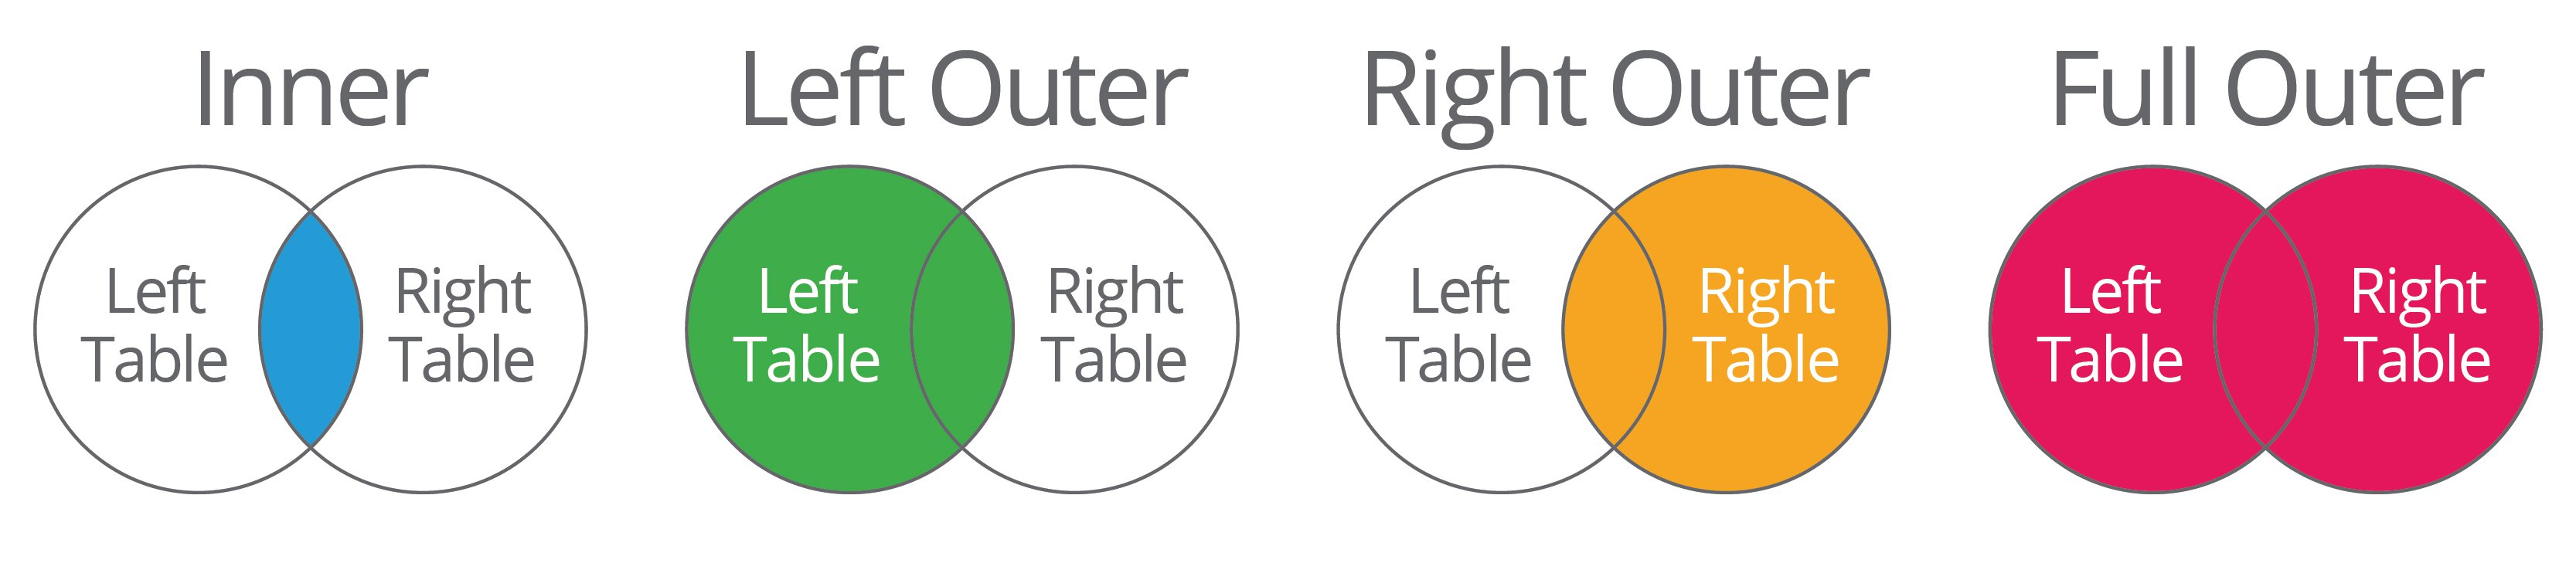

In [27]:
pd.merge(df_ab, df_n, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [28]:
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


### Map-side Join

In [29]:
%%time

pd.merge(
    df_yellow,
    df_taxi_zone[['LocationID', 'service_zone']],
    left_on='PULocationID',
    right_on='LocationID',
).head()

CPU times: user 1.8 s, sys: 460 ms, total: 2.26 s
Wall time: 2.26 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,partition_col,LocationID,service_zone
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,...,0.5,0.5,1.65,0.0,0.3,9.950000,NaN,1,151,Yellow Zone
1,2,2019-01-01 00:52:37,2019-01-01 01:03:42,1,2.10,1,N,151,142,2,...,0.5,0.5,0.00,0.0,0.3,10.800000,NaN,1,151,Yellow Zone
2,1,2019-01-01 00:15:02,2019-01-01 00:22:33,4,1.50,1,N,151,142,2,...,0.5,0.5,0.00,0.0,0.3,9.300000,NaN,1,151,Yellow Zone
3,2,2019-01-01 00:44:29,2019-01-01 00:51:23,3,0.83,1,N,151,238,1,...,0.5,0.5,0.78,0.0,0.3,8.580000,NaN,1,151,Yellow Zone
4,2,2019-01-01 00:54:30,2019-01-01 01:09:16,1,4.73,1,N,151,243,2,...,0.5,0.5,0.00,0.0,0.3,17.299999,NaN,1,151,Yellow Zone


In [30]:
%%time

service_zone_map = dict(zip(df_taxi_zone['LocationID'], df_taxi_zone['service_zone']))
service_zone_col = df_yellow['PULocationID'].map(service_zone_map)
df_yellow['service_zone'] = service_zone_col

CPU times: user 117 ms, sys: 92.4 ms, total: 209 ms
Wall time: 208 ms


In [31]:
df_yellow.drop(columns=['service_zone'], inplace=True)

## GroupBy

In [36]:
for name, group in df_yellow.groupby('PULocationID', sort=False):
    break
    
group.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,partition_col
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.950000,NaN,1
30,2,2019-01-01 00:52:37,2019-01-01 01:03:42,1,2.10,1,N,151,142,2,9.5,0.5,0.5,0.00,0.0,0.3,10.800000,NaN,1
37,1,2019-01-01 00:15:02,2019-01-01 00:22:33,4,1.50,1,N,151,142,2,8.0,0.5,0.5,0.00,0.0,0.3,9.300000,NaN,1
110,2,2019-01-01 00:44:29,2019-01-01 00:51:23,3,0.83,1,N,151,238,1,6.5,0.5,0.5,0.78,0.0,0.3,8.580000,NaN,1
313,2,2019-01-01 00:54:30,2019-01-01 01:09:16,1,4.73,1,N,151,243,2,16.0,0.5,0.5,0.00,0.0,0.3,17.299999,NaN,1


In [34]:
%%time

df_yellow.groupby('PULocationID').get_group(2)

CPU times: user 370 ms, sys: 51.5 ms, total: 421 ms
Wall time: 420 ms


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,partition_col
627596,1,2019-01-04 06:55:07,2019-01-04 08:10:35,1,14.500000,1,N,2,65,1,55.500000,0.0,0.5,11.25,0.00,0.3,67.550003,NaN,4
741757,2,2019-01-04 16:05:29,2019-01-04 16:51:32,2,19.100000,2,N,2,211,2,52.000000,4.5,0.5,0.00,5.76,0.3,63.060001,NaN,4
1244788,1,2019-01-06 18:14:08,2019-01-06 18:51:09,1,18.200001,2,N,2,107,1,52.000000,0.0,0.5,11.70,5.76,0.3,70.260002,NaN,6
2616923,2,2019-01-12 05:06:24,2019-01-12 05:19:14,1,3.880000,5,N,2,117,2,115.550003,0.0,0.5,0.00,2.16,0.3,118.510002,NaN,12
4471019,2,2019-01-19 11:59:57,2019-01-19 12:28:15,1,16.950001,2,N,2,2,1,52.000000,0.0,0.5,11.71,5.76,0.3,70.269997,NaN,19
5588055,2,2019-01-24 08:25:00,2019-01-24 09:00:52,1,7.550000,1,N,2,244,1,30.500000,0.0,0.5,3.00,0.00,0.3,34.299999,0.0,24
6326082,2,2019-01-26 19:36:15,2019-01-26 19:41:23,1,1.600000,1,N,2,263,1,6.500000,0.0,0.5,1.00,0.00,0.3,8.300000,0.0,26
6992591,2,2019-01-29 16:56:11,2019-01-29 17:04:58,1,1.330000,1,N,2,234,1,7.500000,1.0,0.5,1.86,0.00,0.3,11.160000,0.0,29
7324358,2,2019-01-30 20:31:27,2019-01-30 20:40:50,1,1.190000,1,N,2,141,1,7.500000,0.5,0.5,1.00,0.00,0.3,9.800000,0.0,30
7401392,2,2019-01-31 06:26:03,2019-01-31 06:33:25,2,1.410000,1,N,2,2,1,7.000000,0.0,0.5,1.56,0.00,0.3,9.360000,0.0,31


In [35]:
%%time

df_yellow[df_yellow['PULocationID'] == 2]

CPU times: user 5.86 ms, sys: 0 ns, total: 5.86 ms
Wall time: 4.85 ms


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,partition_col
627596,1,2019-01-04 06:55:07,2019-01-04 08:10:35,1,14.500000,1,N,2,65,1,55.500000,0.0,0.5,11.25,0.00,0.3,67.550003,NaN,4
741757,2,2019-01-04 16:05:29,2019-01-04 16:51:32,2,19.100000,2,N,2,211,2,52.000000,4.5,0.5,0.00,5.76,0.3,63.060001,NaN,4
1244788,1,2019-01-06 18:14:08,2019-01-06 18:51:09,1,18.200001,2,N,2,107,1,52.000000,0.0,0.5,11.70,5.76,0.3,70.260002,NaN,6
2616923,2,2019-01-12 05:06:24,2019-01-12 05:19:14,1,3.880000,5,N,2,117,2,115.550003,0.0,0.5,0.00,2.16,0.3,118.510002,NaN,12
4471019,2,2019-01-19 11:59:57,2019-01-19 12:28:15,1,16.950001,2,N,2,2,1,52.000000,0.0,0.5,11.71,5.76,0.3,70.269997,NaN,19
5588055,2,2019-01-24 08:25:00,2019-01-24 09:00:52,1,7.550000,1,N,2,244,1,30.500000,0.0,0.5,3.00,0.00,0.3,34.299999,0.0,24
6326082,2,2019-01-26 19:36:15,2019-01-26 19:41:23,1,1.600000,1,N,2,263,1,6.500000,0.0,0.5,1.00,0.00,0.3,8.300000,0.0,26
6992591,2,2019-01-29 16:56:11,2019-01-29 17:04:58,1,1.330000,1,N,2,234,1,7.500000,1.0,0.5,1.86,0.00,0.3,11.160000,0.0,29
7324358,2,2019-01-30 20:31:27,2019-01-30 20:40:50,1,1.190000,1,N,2,141,1,7.500000,0.5,0.5,1.00,0.00,0.3,9.800000,0.0,30
7401392,2,2019-01-31 06:26:03,2019-01-31 06:33:25,2,1.410000,1,N,2,2,1,7.000000,0.0,0.5,1.56,0.00,0.3,9.360000,0.0,31


In [37]:
df_yellow.groupby('PULocationID')['fare_amount'].mean()

PULocationID
1      76.240250
2      38.605000
3      30.932915
4      11.472075
5      75.199997
         ...    
261    16.027674
262     9.911687
263     9.255138
264    14.935798
265    59.722305
Name: fare_amount, Length: 263, dtype: float32

In [38]:
df_yellow.groupby('PULocationID')['fare_amount'].agg(['mean', 'count'])

,mean,count
PULocationID,,
1,76.240250,446
2,38.605000,10
3,30.932915,175
4,11.472075,13955
5,75.199997,5
...,...,...
261,16.027674,38440
262,9.911687,98820
263,9.255138,156061


In [39]:
df_yellow.groupby('PULocationID')['DOLocationID'].agg(set)

PULocationID
1      {1, 132, 164, 230, 264, 265, 137, 236, 237, 14...
2             {65, 2, 263, 234, 107, 141, 211, 244, 117}
3      {130, 3, 132, 263, 136, 265, 139, 140, 142, 16...
4      {1, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 1...
5                                {5, 233, 173, 118, 186}
                             ...                        
261    {1, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17...
262    {1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
263    {1, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
264    {1, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...
265    {1, 2, 3, 4, 7, 10, 13, 14, 18, 19, 20, 21, 23...
Name: DOLocationID, Length: 263, dtype: object

### GroupBy + apply

`apply` применяется ко всему `pd.DataFrame` представляющей собой группу, т.е. доступ ко всем столбцам.

In [40]:
df_yellow.groupby('VendorID')['trip_distance'].apply(lambda x: x.sort_values(ascending=False).head(3))

VendorID         
1         6074021    831.799988
          4286612    700.700012
          2567394    144.199997
2         6770897    214.009995
          4707513    211.360001
          4881766    201.270004
4         7453439     55.759998
          1296231     40.459999
          4609427     40.009998
Name: trip_distance, dtype: float32

In [41]:
df_yellow.groupby('VendorID')['trip_distance'].nlargest(3)

VendorID         
1         6074021    831.799988
          4286612    700.700012
          2567394    144.199997
2         6770897    214.009995
          4707513    211.360001
          4881766    201.270004
4         7453439     55.759998
          1296231     40.459999
          4609427     40.009998
Name: trip_distance, dtype: float32

In [42]:
df_yellow.reset_index().groupby('VendorID')[['trip_distance', 'index']] \
    .apply(lambda x: x.sort_values(by='trip_distance', ascending=False).head(3))

trip_distance    index
VendorID                                
1        6074021     831.799988  6074021
         4286612     700.700012  4286612
         2567394     144.199997  2567394
2        6770897     214.009995  6770897
         4707513     211.360001  4707513
         4881766     201.270004  4881766
4        7453439      55.759998  7453439
         1296231      40.459999  1296231
         4609427      40.009998  4609427

### GroupBy + transform

`transform` применяется поколоночно для `pd.DataFrame` представляющего собой группу, каждому элементу группы должно быть сопоставлено число.

In [43]:
# same as df_yellow.groupby('VendorID')['trip_distance'].max() and join

pd.concat([
    df_yellow.groupby('VendorID')['trip_distance'].transform(np.max),
    df_yellow['VendorID'],
], axis=1)

,trip_distance,VendorID
0,831.799988,1
1,831.799988,1
2,214.009995,2
3,214.009995,2
4,214.009995,2
...,...,...
7667787,214.009995,2
7667788,214.009995,2
7667789,214.009995,2
7667790,214.009995,2


In [44]:
# Not the same:
# (df_yellow['trip_distance'] - df_yellow['trip_distance'].mean()) / df_yellow['trip_distance'].std()

pd.concat([
    df_yellow.groupby('VendorID')['trip_distance'].transform(lambda x: (x - x.mean()) / x.std()),
    df_yellow['VendorID'],
], axis=1)

,trip_distance,VendorID
0,-0.320452,1
1,-0.009418,1
2,-0.753994,2
3,-0.753994,2
4,-0.753994,2
...,...,...
7667787,0.486659,2
7667788,-0.753994,2
7667789,-0.753994,2
7667790,-0.753994,2


## Polars

https://github.com/pola-rs/polars/

In [45]:
import polars as pl

In [46]:
# df_yellow_pl = pl.from_pandas(df_yellow)

df_yellow_pl = pl.read_parquet('data/yellow_tripdata_2019-01.parquet')
df_yellow_pl.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
i64,datetime[ns],datetime[ns],i8,f32,i64,cat,i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32
1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,"""N""",151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,null
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,"""N""",239,246,1,14.0,0.5,0.5,1.0,0.0,0.3,16.299999,null
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,"""N""",236,236,1,4.5,0.5,0.5,0.0,0.0,0.3,5.8,null
2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,"""N""",193,193,2,3.5,0.5,0.5,0.0,0.0,0.3,7.55,null
2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,"""N""",193,193,2,52.0,0.0,0.5,0.0,0.0,0.3,55.549999,null


Синтаксис бибилиотеки сильно отличается от синтаксиса `pandas` и больше похож на синтаксис `pyspark`.

In [47]:
df_yellow_pl.select([
    pl.col("VendorID"),
    pl.col("RatecodeID"),
    pl.col("PULocationID"),
    pl.col("DOLocationID"),
]).head()

VendorID,RatecodeID,PULocationID,DOLocationID
i64,i64,i16,i16
1,1,151,239
1,1,239,246
2,1,236,236
2,1,193,193
2,2,193,193


### Polars. GroupBy

`polars` позволяет эффективно делать операции `join` и `groupby`.

In [48]:
%%time

df_yellow.groupby('PULocationID')['fare_amount'].agg(['mean', 'count'])

CPU times: user 113 ms, sys: 35.3 ms, total: 148 ms
Wall time: 147 ms


,mean,count
PULocationID,,
1,76.240250,446
2,38.605000,10
3,30.932915,175
4,11.472075,13955
5,75.199997,5
...,...,...
261,16.027674,38440
262,9.911687,98820
263,9.255138,156061


In [49]:
%%time

df_yellow_pl.groupby('PULocationID').agg({'fare_amount': ['mean', 'count']})

CPU times: user 606 ms, sys: 73.9 ms, total: 680 ms
Wall time: 50.2 ms


PULocationID,fare_amount_mean,fare_amount_count
i16,f32,u32
256,13.760561,3987
224,10.739352,15520
32,28.925814,303
64,35.442833,67
96,14.672501,32
128,21.265362,69
160,26.888733,182
192,23.155914,137
159,18.917669,686


### Polars. Join

In [50]:
%%time

pd.merge(
    df_yellow,
    df_taxi_zone,
    left_on='PULocationID',
    right_on='LocationID',
).head()

CPU times: user 1.8 s, sys: 540 ms, total: 2.34 s
Wall time: 2.34 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,partition_col,LocationID,Borough,Zone,service_zone
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,...,1.65,0.0,0.3,9.950000,NaN,1,151,Manhattan,Manhattan Valley,Yellow Zone
1,2,2019-01-01 00:52:37,2019-01-01 01:03:42,1,2.10,1,N,151,142,2,...,0.00,0.0,0.3,10.800000,NaN,1,151,Manhattan,Manhattan Valley,Yellow Zone
2,1,2019-01-01 00:15:02,2019-01-01 00:22:33,4,1.50,1,N,151,142,2,...,0.00,0.0,0.3,9.300000,NaN,1,151,Manhattan,Manhattan Valley,Yellow Zone
3,2,2019-01-01 00:44:29,2019-01-01 00:51:23,3,0.83,1,N,151,238,1,...,0.78,0.0,0.3,8.580000,NaN,1,151,Manhattan,Manhattan Valley,Yellow Zone
4,2,2019-01-01 00:54:30,2019-01-01 01:09:16,1,4.73,1,N,151,243,2,...,0.00,0.0,0.3,17.299999,NaN,1,151,Manhattan,Manhattan Valley,Yellow Zone


In [51]:
%%time

df_yellow_pl.join(
    pl.from_pandas(df_taxi_zone),
    left_on='PULocationID',
    right_on='LocationID',
).head()

CPU times: user 1.61 s, sys: 2.17 s, total: 3.78 s
Wall time: 566 ms


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Borough,Zone,service_zone
i64,datetime[ns],datetime[ns],i8,f32,i64,cat,i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str
1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,"""N""",151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,null,"""Manhattan""","""Manhattan Vall...","""Yellow Zone"""
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,"""N""",239,246,1,14.0,0.5,0.5,1.0,0.0,0.3,16.299999,null,"""Manhattan""","""Upper West Sid...","""Yellow Zone"""
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,"""N""",236,236,1,4.5,0.5,0.5,0.0,0.0,0.3,5.8,null,"""Manhattan""","""Upper East Sid...","""Yellow Zone"""
2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,"""N""",193,193,2,3.5,0.5,0.5,0.0,0.0,0.3,7.55,null,"""Queens""","""Queensbridge/R...","""Boro Zone"""
2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,"""N""",193,193,2,52.0,0.0,0.5,0.0,0.0,0.3,55.549999,null,"""Queens""","""Queensbridge/R...","""Boro Zone"""


## What else?

Фреймфорки:
- https://www.dask.org/;
- https://github.com/jmcarpenter2/swifter;
- https://github.com/modin-project/modin;
- https://spark.apache.org/docs/latest/api/python/.

Писать оптимзированный код:
- numpy;
- numba;
- cython.